In [54]:
# -------------------------
# Cell 1: Install Dependencies
# -------------------------
print("⏳ Installing PyBullet, MediaPipe, SciPy, OpenCV, and Wget...")
# We add --upgrade numpy protobuf to allow pip
# to upgrade the base packages and resolve the conflicts.
# We also add wget.
!pip install -q --upgrade pybullet mediapipe scipy opencv-python numpy protobuf wget
print("✅ Dependencies installed.")

print("\n‼️ IMPORTANT: You must RESTART THE RUNTIME now.")
print("   Go to 'Runtime' -> 'Restart runtime' in the menu above.")

⏳ Installing PyBullet, MediaPipe, SciPy, OpenCV, and Wget...
✅ Dependencies installed.

‼️ IMPORTANT: You must RESTART THE RUNTIME now.
   Go to 'Runtime' -> 'Restart runtime' in the menu above.


In [55]:
# -------------------------
# Cell 2: Define and Save URDF
# -------------------------
import pybullet as p
import pybullet_data
import os
import sys
import numpy as np # Ensure numpy is imported

print("--- [Step 1] Defining Robot URDF (Full Format) ---")

URDF_PATH = "/content/biped.urdf"
SIMPLE_BIPED_URDF_XML = """<?xml version="1.0"?>
<robot name="humanoid_biped">

  <link name="torso">
    <inertial>
      <mass value="10"/>
      <origin xyz="0 0 0" rpy="0 0 0"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
    <visual>
      <origin xyz="0 0 0" rpy="0 0 0"/>
      <geometry><box size="0.1 0.05 0.4"/></geometry>
      <material name="blue"><color rgba="0 0 1 1"/></material>
    </visual>
    <collision>
       <origin xyz="0 0 0" rpy="0 0 0"/>
      <geometry><box size="0.1 0.05 0.4"/></geometry>
    </collision>
  </link>

  <link name="head">
    <inertial>
      <mass value="2"/>
      <origin xyz="0 0 0" rpy="0 0 0"/>
      <inertia ixx="0.02" ixy="0" ixz="0" iyy="0.02" iyz="0" izz="0.02"/>
    </inertial>
    <visual>
       <origin xyz="0 0 0" rpy="0 0 0"/>
      <geometry><sphere radius="0.08"/></geometry>
      <material name="skin"><color rgba="1 0.8 0.6 1"/></material>
    </visual>
    <collision>
       <origin xyz="0 0 0" rpy="0 0 0"/>
       <geometry><sphere radius="0.08"/></geometry>
    </collision>
  </link>
  <joint name="j_head" type="revolute"> <parent link="torso"/>
    <child link="head"/>
    <origin xyz="0 0 0.2" rpy="0 0 0"/> <axis xyz="0 1 0"/>
    <limit lower="-0.785" upper="0.785" effort="10" velocity="5"/> </joint>

  <link name="upperarm_l">
    <inertial>
      <mass value="2"/>
      <origin xyz="0 0 -0.06" rpy="0 0 0"/> <inertia ixx="0.005" ixy="0" ixz="0" iyy="0.005" iyz="0" izz="0.001"/>
    </inertial>
    <visual>
      <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.04 0.04 0.12"/></geometry> <material name="orange"><color rgba="1 0.5 0 1"/></material>
    </visual>
    <collision>
      <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.04 0.04 0.12"/></geometry>
    </collision>
  </link>
  <joint name="j_shoulder_l" type="revolute"> <parent link="torso"/>
    <child link="upperarm_l"/>
    <origin xyz="0.07 0 0.18" rpy="0 0 0"/> <axis xyz="0 1 0"/>
    <limit lower="-1.57" upper="1.57" effort="50" velocity="10"/>
  </joint>

  <link name="forearm_l">
     <inertial>
      <mass value="1.5"/>
       <origin xyz="0 0 -0.06" rpy="0 0 0"/> <inertia ixx="0.004" ixy="0" ixz="0" iyy="0.004" iyz="0" izz="0.001"/>
    </inertial>
    <visual>
       <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.035 0.035 0.12"/></geometry>
      <material name="lightorange"><color rgba="1 0.7 0.3 1"/></material>
    </visual>
    <collision>
       <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.035 0.035 0.12"/></geometry>
    </collision>
  </link>
  <joint name="j_elbow_l" type="revolute"> <parent link="upperarm_l"/>
     <child link="forearm_l"/>
    <origin xyz="0 0 -0.12" rpy="0 0 0"/> <axis xyz="0 1 0"/>
    <limit lower="0" upper="2.618" effort="30" velocity="10"/> </joint>

  <link name="upperarm_r">
    <inertial>
      <mass value="2"/>
      <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <inertia ixx="0.005" ixy="0" ixz="0" iyy="0.005" iyz="0" izz="0.001"/>
    </inertial>
    <visual>
      <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.04 0.04 0.12"/></geometry>
      <material name="orange"/>
    </visual>
    <collision>
      <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.04 0.04 0.12"/></geometry>
    </collision>
  </link>
  <joint name="j_shoulder_r" type="revolute"> <parent link="torso"/>
    <child link="upperarm_r"/>
    <origin xyz="-0.07 0 0.18" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit lower="-1.57" upper="1.57" effort="50" velocity="10"/>
  </joint>

  <link name="forearm_r">
     <inertial>
      <mass value="1.5"/>
       <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <inertia ixx="0.004" ixy="0" ixz="0" iyy="0.004" iyz="0" izz="0.001"/>
    </inertial>
    <visual>
       <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.035 0.035 0.12"/></geometry>
       <material name="lightorange"/>
    </visual>
    <collision>
       <origin xyz="0 0 -0.06" rpy="0 0 0"/>
      <geometry><box size="0.035 0.035 0.12"/></geometry>
    </collision>
  </link>
  <joint name="j_elbow_r" type="revolute"> <parent link="upperarm_r"/>
    <child link="forearm_r"/>
     <origin xyz="0 0 -0.12" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit lower="0" upper="2.618" effort="30" velocity="10"/>
  </joint>

  <link name="thigh_l">
    <inertial>
      <mass value="5"/>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/> <inertia ixx="0.05" ixy="0" ixz="0" iyy="0.05" iyz="0" izz="0.01"/>
    </inertial>
    <visual>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.08 0.05 0.3"/></geometry>
      <material name="red"><color rgba="1 0 0 1"/></material>
    </visual>
    <collision>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.08 0.05 0.3"/></geometry>
    </collision>
  </link>
  <joint name="j_thigh_l" type="revolute"> <parent link="torso"/>
    <child link="thigh_l"/>
    <origin xyz="0.04 0 -0.2" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit lower="-1.57" upper="1.57" effort="100" velocity="10"/>
  </joint>

  <link name="shin_l">
    <inertial>
      <mass value="3"/>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/> <inertia ixx="0.03" ixy="0" ixz="0" iyy="0.03" iyz="0" izz="0.005"/>
    </inertial>
    <visual>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.06 0.05 0.3"/></geometry>
      <material name="green"><color rgba="0 1 0 1"/></material>
    </visual>
    <collision>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.06 0.05 0.3"/></geometry>
    </collision>
  </link>
  <joint name="j_shin_l" type="revolute"> <parent link="thigh_l"/>
    <child link="shin_l"/>
    <origin xyz="0 0 -0.3" rpy="0 0 0"/> <axis xyz="0 1 0"/>
    <limit lower="0" upper="2.79" effort="100" velocity="10"/> </joint>

  <link name="foot_l">
     <inertial>
       <mass value="1"/>
       <origin xyz="0.04 0 -0.025" rpy="0 0 0"/> <inertia ixx="0.001" ixy="0" ixz="0" iyy="0.001" iyz="0" izz="0.001"/>
     </inertial>
    <visual>
       <origin xyz="0.04 0 -0.025" rpy="0 0 0"/>
      <geometry><box size="0.15 0.05 0.05"/></geometry>
      <material name="yellow"><color rgba="1 1 0 1"/></material>
    </visual>
    <collision>
       <origin xyz="0.04 0 -0.025" rpy="0 0 0"/>
      <geometry><box size="0.15 0.05 0.05"/></geometry>
    </collision>
  </link>
  <joint name="j_foot_l" type="revolute"> <parent link="shin_l"/>
    <child link="foot_l"/>
    <origin xyz="0 0 -0.3" rpy="0 0 0"/> <axis xyz="0 1 0"/>
    <limit lower="-0.785" upper="0.785" effort="50" velocity="10"/> </joint>

   <link name="thigh_r">
    <inertial>
      <mass value="5"/>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <inertia ixx="0.05" ixy="0" ixz="0" iyy="0.05" iyz="0" izz="0.01"/>
    </inertial>
    <visual>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.08 0.05 0.3"/></geometry>
       <material name="red"/>
    </visual>
    <collision>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.08 0.05 0.3"/></geometry>
    </collision>
  </link>
  <joint name="j_thigh_r" type="revolute"> <parent link="torso"/>
    <child link="thigh_r"/>
    <origin xyz="-0.04 0 -0.2" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit lower="-1.57" upper="1.57" effort="100" velocity="10"/>
  </joint>

  <link name="shin_r">
     <inertial>
      <mass value="3"/>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <inertia ixx="0.03" ixy="0" ixz="0" iyy="0.03" iyz="0" izz="0.005"/>
    </inertial>
    <visual>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.06 0.05 0.3"/></geometry>
      <material name="green"/>
    </visual>
    <collision>
      <origin xyz="0 0 -0.15" rpy="0 0 0"/>
      <geometry><box size="0.06 0.05 0.3"/></geometry>
    </collision>
  </link>
  <joint name="j_shin_r" type="revolute"> <parent link="thigh_r"/>
    <child link="shin_r"/>
    <origin xyz="0 0 -0.3" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit lower="0" upper="2.79" effort="100" velocity="10"/>
  </joint>

  <link name="foot_r">
     <inertial>
       <mass value="1"/>
       <origin xyz="0.04 0 -0.025" rpy="0 0 0"/>
       <inertia ixx="0.001" ixy="0" ixz="0" iyy="0.001" iyz="0" izz="0.001"/>
     </inertial>
    <visual>
       <origin xyz="0.04 0 -0.025" rpy="0 0 0"/>
      <geometry><box size="0.15 0.05 0.05"/></geometry>
      <material name="yellow"/>
    </visual>
    <collision>
       <origin xyz="0.04 0 -0.025" rpy="0 0 0"/>
      <geometry><box size="0.15 0.05 0.05"/></geometry>
    </collision>
  </link>
  <joint name="j_foot_r" type="revolute"> <parent link="shin_r"/>
    <child link="foot_r"/>
    <origin xyz="0 0 -0.3" rpy="0 0 0"/> <axis xyz="0 1 0"/>
     <limit lower="-0.785" upper="0.785" effort="50" velocity="10"/>
  </joint>

</robot>
"""

try:
    with open(URDF_PATH, "w") as f:
        f.write(SIMPLE_BIPED_URDF_XML)
    print(f"✅ URDF file written to: {URDF_PATH}")
except IOError as e:
    print(f"❌ FATAL: Could not write URDF file. Error: {e}")
    # sys.exit(1)

# Ensure pybullet_data is accessible for plane.urdf etc.
try:
    p.connect(p.DIRECT) # Connect temporarily to check path
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    print(f"PyBullet data path accessible: {pybullet_data.getDataPath()}")
    p.disconnect()
except Exception as e:
    print(f"⚠️ Warning: Could not verify pybullet_data path: {e}")

--- [Step 1] Defining Robot URDF (Full Format) ---
✅ URDF file written to: /content/biped.urdf
PyBullet data path accessible: /usr/local/lib/python3.12/dist-packages/pybullet_data


In [91]:
# -------------------------
# Cell: Download EfficientDet-Lite2 Model
# -------------------------
import os
import wget

print("--- Downloading EfficientDet-Lite2 Model ---")

MODEL_PATH_L2 = "/content/efficientdet_lite2.tflite"
MODEL_URL_L2 = "https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite2/int8/1/efficientdet_lite2.tflite"

if not os.path.exists(MODEL_PATH_L2):
    try:
        print(f"⏳ Downloading model to {MODEL_PATH_L2}...")
        wget.download(MODEL_URL_L2, MODEL_PATH_L2)
        print(f"\n✅ Download complete: {MODEL_PATH_L2}")
    except Exception as e:
        print(f"❌ Download failed: {e}")
else:
    print(f"✅ Model already present: {MODEL_PATH_L2}")

--- Downloading EfficientDet-Lite2 Model ---
⏳ Downloading model to /content/efficientdet_lite2.tflite...

✅ Download complete: /content/efficientdet_lite2.tflite


In [92]:
# -------------------------
# Cell 4: MultiPersonMediaPipeConverter Class (Corrected)
# -------------------------
import cv2
import mediapipe as mp
import numpy as np
import math
import pybullet as p
import pybullet_data
from google.colab.patches import cv2_imshow
import time
import os
import sys
from copy import deepcopy

# --- NEW IMPORTS for MediaPipe Tasks API ---
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Tell MediaPipe where to find its model files
try:
    import mediapipe.python.solutions.pose as pose_solution
    import mediapipe.python.solutions.drawing_utils as drawing_utils
except ImportError:
    pass

class MultiPersonMediaPipeConverter:
    """
    Implements Module 1 using the "MediaPipe-Only" Two-Stage approach:
    - Stage 1: NEW mp.tasks.vision.ObjectDetector to find 'person' bounding boxes.
    - Stage 2: Loop and run OLD mp.solutions.pose on each cropped person.
    - Stage 3: Selects largest skeleton by BBox (Task 1.3 - Selection)
    - Stage 4: Uses simple 2D angle (atan2) for conversion (Task 1.3 - Conversion)
    """
    def __init__(self, urdf_path, detector_model_path, min_vis_threshold=0.5, min_detect_conf=0.5):
        print("\n--- Initializing MultiPersonMediaPipeConverter (Tasks API) ---")
        self.MIN_VISIBILITY = min_vis_threshold
        self.MIN_DETECT_CONF = min_detect_conf
        self.MP_LANDMARKS = mp.solutions.pose.PoseLandmark

        # --- Stage 1 Model: Person Detector (NEW Tasks API) ---
        try:
            base_options = python.BaseOptions(model_asset_path=detector_model_path)
            options = vision.ObjectDetectorOptions(
                base_options=base_options,
                running_mode=vision.RunningMode.IMAGE,
                score_threshold=self.MIN_DETECT_CONF,
                category_allowlist=['person'],
                max_results=10  # Find up to 10 people
            )
            self.mp_detector = vision.ObjectDetector.create_from_options(options)
            print("  [Init] ✅ MediaPipe ObjectDetector (Tasks API) model loaded.")
        except Exception as e:
            print(f"❌ FATAL: Could not load ObjectDetector model. Error: {e}")
            raise e

        # --- Stage 2 Model: Pose Estimator (OLD Solutions API - still works) ---
        self.mp_pose = mp.solutions.pose.Pose(
            static_image_mode=True,
            model_complexity=1,
            min_detection_confidence=self.MIN_DETECT_CONF
        )
        print("  [Init] ✅ MediaPipe Pose model loaded.")

        # --- Load Robot Joint Info ---
        self.urdf_path = urdf_path
        self.joint_indices, self.joint_names = self._get_robot_joint_info()
        self.NUM_CONTROLLABLE_JOINTS = len(self.joint_indices)
        self.DEFAULT_STAND_POSE = np.zeros(self.NUM_CONTROLLABLE_JOINTS)
        print(f"  [Init] ✅ Loaded URDF. Found {self.NUM_CONTROLLABLE_JOINTS} controllable joints.")

        # --- Define the 3-point keypoint map ---
        self.joint_angle_map = {
            'j_shoulder_l': (self.MP_LANDMARKS.LEFT_HIP, self.MP_LANDMARKS.LEFT_SHOULDER, self.MP_LANDMARKS.LEFT_ELBOW),
            'j_elbow_l': (self.MP_LANDMARKS.LEFT_SHOULDER, self.MP_LANDMARKS.LEFT_ELBOW, self.MP_LANDMARKS.LEFT_WRIST),
            'j_shoulder_r': (self.MP_LANDMARKS.RIGHT_HIP, self.MP_LANDMARKS.RIGHT_SHOULDER, self.MP_LANDMARKS.RIGHT_ELBOW),
            'j_elbow_r': (self.MP_LANDMARKS.RIGHT_SHOULDER, self.MP_LANDMARKS.RIGHT_ELBOW, self.MP_LANDMARKS.RIGHT_WRIST),
            'j_thigh_l': (self.MP_LANDMARKS.LEFT_SHOULDER, self.MP_LANDMARKS.LEFT_HIP, self.MP_LANDMARKS.LEFT_KNEE),
            'j_shin_l': (self.MP_LANDMARKS.LEFT_HIP, self.MP_LANDMARKS.LEFT_KNEE, self.MP_LANDMARKS.LEFT_ANKLE),
            'j_foot_l': (self.MP_LANDMARKS.LEFT_KNEE, self.MP_LANDMARKS.LEFT_ANKLE, self.MP_LANDMARKS.LEFT_FOOT_INDEX),
            'j_thigh_r': (self.MP_LANDMARKS.RIGHT_SHOULDER, self.MP_LANDMARKS.RIGHT_HIP, self.MP_LANDMARKS.RIGHT_KNEE),
            'j_shin_r': (self.MP_LANDMARKS.RIGHT_HIP, self.MP_LANDMARKS.RIGHT_KNEE, self.MP_LANDMARKS.RIGHT_ANKLE),
            'j_foot_r': (self.MP_LANDMARKS.RIGHT_KNEE, self.MP_LANDMARKS.RIGHT_ANKLE, self.MP_LANDMARKS.RIGHT_FOOT_INDEX),
        }
        print(f"  [Init] ✅ Joint map defined for {len(self.joint_angle_map)} joints.")
        print("--- Converter Initialized Successfully ---")

    def __del__(self):
        """Ensure the new detector is closed properly."""
        if hasattr(self, 'mp_detector'):
            self.mp_detector.close()
            # print("  [Cleanup] MediaPipe ObjectDetector closed.") # Quieter cleanup

    def _get_robot_joint_info(self):
        """Helper to get controllable joint indices and names from URDF."""
        client = p.connect(p.DIRECT)
        robot_id = p.loadURDF(self.urdf_path, physicsClientId=client)
        joint_indices = []
        joint_names = []
        num_joints = p.getNumJoints(robot_id, physicsClientId=client)

        for i in range(num_joints):
            info = p.getJointInfo(robot_id, i, physicsClientId=client)
            joint_name = info[1].decode('utf-8')
            joint_type = info[2]
            if joint_type == p.JOINT_REVOLUTE:
                if joint_name == 'j_head': # Exclude head
                    continue
                joint_indices.append(i)
                joint_names.append(joint_name)

        p.disconnect(physicsClientId=client)
        return joint_indices, joint_names

    def _calculate_angle_2d(self, p1_landmark, p2_vertex, p3_landmark):
        """Calculates the signed 2D angle at p2_vertex using atan2."""
        if (p1_landmark is None or p2_vertex is None or p3_landmark is None or
            p1_landmark.visibility < self.MIN_VISIBILITY or
            p2_vertex.visibility < self.MIN_VISIBILITY or
            p3_landmark.visibility < self.MIN_VISIBILITY):
            return None

        v1 = [p1_landmark.x - p2_vertex.x, p1_landmark.y - p2_vertex.y]
        v2 = [p3_landmark.x - p2_vertex.x, p3_landmark.y - p2_vertex.y]

        angle1_rad = math.atan2(v1[1], v1[0])
        angle2_rad = math.atan2(v2[1], v2[0])
        angle_diff_rad = angle2_rad - angle1_rad
        angle_diff_rad = (angle_diff_rad + math.pi) % (2 * math.pi) - math.pi

        return angle_diff_rad

    def _get_fallback_pose(self, reason=""):
        """Returns the default standing pose."""
        print(f"\n--- [MODULE 1 FALLBACK] ---")
        print(f"  Reason: {reason}")
        print(f"  Returning default standing pose (all zeros).")
        print("---------------------------\n")
        return np.copy(self.DEFAULT_STAND_POSE)

    def _get_pixel_box(self, detection, img_width, img_height):
        """Converts MediaPipe's Tasks BBox to pixel coordinates [x, y, w, h]."""
        box = detection.bounding_box
        x = max(0, box.origin_x)
        y = max(0, box.origin_y)
        w = min(box.width, img_width - x)
        h = min(box.height, img_height - y)
        return (x, y, w, h)

    # ------------------------------------------------------------------
    # --- NEW HELPER FUNCTION TO SATISFY TASK 1.2 OUTPUT ---
    # ------------------------------------------------------------------
    def _landmarks_to_pixel_array(self, landmarks, img_width, img_height):
        """
        Converts MediaPipe Landmarks object to a [33, 3] NumPy array
        of (x_pixel, y_pixel, confidence/visibility).
        This matches the spirit of the [25, 3] output requested in the doc.
        """
        if landmarks is None:
            # Return an empty array of the correct shape
            return np.zeros((33, 3), dtype=np.float32)

        skeleton_array = np.zeros((33, 3), dtype=np.float32)
        for i, lm in enumerate(landmarks.landmark):
            skeleton_array[i, 0] = lm.x * img_width   # x (pixel)
            skeleton_array[i, 1] = lm.y * img_height  # y (pixel)
            skeleton_array[i, 2] = lm.visibility     # confidence
        return skeleton_array
    # ------------------------------------------------------------------

    def _select_largest_skeleton(self, detected_skeletons):
        """
        Selects skeleton with largest BBox area.
        (Task 1.3 - Selection)
        Input: list of (landmarks, pixel_box) tuples.
        """
        print(f"    [Select] Evaluating {len(detected_skeletons)} detected skeletons...")
        largest_area = -1
        selected_skeleton_landmarks = None
        selected_bbox = (0, 0, 0, 0) # (x, y, w, h)

        for (landmarks, pixel_box) in detected_skeletons:
             (x, y, w, h) = pixel_box
             area = w * h
             if area > largest_area:
                largest_area = area
                selected_skeleton_landmarks = landmarks
                selected_bbox = pixel_box

        if selected_skeleton_landmarks is not None:
             print(f"    [Select] ✅ Selected Skeleton (Largest Area: {largest_area:.0f})")
        else:
             print(f"    [Select] ⚠️ No suitable skeleton found for selection.")

        return selected_skeleton_landmarks, selected_bbox

    def _draw_poses(self, image, all_boxes, selected_landmarks, selected_box):
        """Draws all boxes (blue), selected box (red), and selected skeleton (green)."""
        img_drawn = image.copy()

        # --- Draw ALL detected boxes in blue ---
        for box in all_boxes:
            (x, y, w, h) = box
            if box == selected_box: continue
            cv2.rectangle(img_drawn, (x, y), (x + w, y + h), (255, 0, 0), 2) # Blue

        # --- Draw the SELECTED box in red ---
        (x_s, y_s, w_s, h_s) = selected_box
        cv2.rectangle(img_drawn, (x_s, y_s), (x_s + w_s, y_s + h_s), (0, 0, 255), 3) # Red, thicker
        cv2.putText(img_drawn, "SELECTED", (x_s, y_s - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        # --- Draw the SELECTED skeleton in green ---
        if selected_landmarks:
            drawing_utils.draw_landmarks(
                img_drawn,
                selected_landmarks,
                mp.solutions.pose.POSE_CONNECTIONS,
                landmark_drawing_spec=drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                connection_drawing_spec=drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
            )
        return img_drawn

    def run_pipeline(self, image_path):
        """Main public function executing the full pipeline."""
        print(f"\n--- [Module 1 START] Processing Image: {os.path.basename(image_path)} ---")
        start_time = time.time()

        # Step 1: Image Loading
        try:
            image_cv = cv2.imread(image_path)
            if image_cv is None:
                return self._get_fallback_pose(f"Image Load Fail: Could not read file at {image_path}")
            img_height, img_width, _ = image_cv.shape
            print(f"  [Step 1] ✅ Image loaded ({img_width}x{img_height}).")

            image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
            image_mp = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)

        except Exception as e:
            return self._get_fallback_pose(f"Image Load Fail: {e}")

        # --- Stage 1: Detect All People (Task 1.2) ---
        print("  [Stage 1] Running Person Detector (Multi-Person)...")
        detector_results = self.mp_detector.detect(image_mp)
        person_detections = detector_results.detections

        if not person_detections:
            print("  [Stage 1] ⚠️ No 'Person' objects found by the detector.")
            return self._get_fallback_pose("No Skeletons Detected")

        print(f"  [Stage 1] ✅ Found {len(person_detections)} potential 'Person' bounding boxes.")

        # --- Stage 2: Loop and Get Skeletons ---
        print("  [Stage 2] Running Pose Estimator on each detected person...")
        detected_skeletons = [] # This will be a list of (landmarks, pixel_box)
        all_pixel_boxes = []

        for detection in person_detections:
            pixel_box = self._get_pixel_box(detection, img_width, img_height)
            (x, y, w, h) = pixel_box
            all_pixel_boxes.append(pixel_box)

            pad_x = int(w * 0.1); pad_y = int(h * 0.1)
            x_crop = max(0, x - pad_x); y_crop = max(0, y - pad_y)
            w_crop = min(w + 2*pad_x, img_width - x_crop)
            h_crop = min(h + 2*pad_y, img_height - y_crop)

            cropped_image_rgb = image_rgb[y_crop:y_crop+h_crop, x_crop:x_crop+w_crop]

            if cropped_image_rgb.size == 0:
                print(f"    [Crop] ⚠️ Skipping box {pixel_box}, empty crop.")
                continue

            pose_results = self.mp_pose.process(cropped_image_rgb)

            if pose_results.pose_landmarks:
                full_image_landmarks = self._convert_landmarks_to_full_image(
                    pose_results.pose_landmarks, x_crop, y_crop, w_crop, h_crop, img_width, img_height
                )
                detected_skeletons.append((full_image_landmarks, pixel_box))

        print(f"  [Stage 2] ✅ Successfully extracted {len(detected_skeletons)} skeletons.")

        if not detected_skeletons:
            return self._get_fallback_pose("No Skeletons Assembled")

        # ------------------------------------------------------------------
        # --- NEW PRINT BLOCK TO SATISFY TASK 1.2 OUTPUT ---
        # ------------------------------------------------------------------
        print("\n--- Output for Task 1.2: List of Skeletons ---")
        print(f"Total skeletons found: {len(detected_skeletons)}")

        for i, (landmarks, pixel_box) in enumerate(detected_skeletons):
            # Convert landmarks to a [33, 3] (x_pixel, y_pixel, confidence) array
            skeleton_array = self._landmarks_to_pixel_array(landmarks, img_width, img_height)
            print(f"\n  Skeleton {i+1} [Array of (x, y, confidence)]: (Shape: {skeleton_array.shape})")

            # Set print options to be more readable
            np.set_printoptions(precision=2, suppress=True)
            print(skeleton_array)
            np.set_printoptions() # Reset to default

        print("----------------------------------------------\n")
        # ------------------------------------------------------------------


        # --- Stage 3: Select Largest Skeleton (Task 1.3 - Selection) ---
        selected_landmarks, selected_bbox = self._select_largest_skeleton(detected_skeletons)
        if selected_landmarks is None:
             return self._get_fallback_pose("Skeleton Selection Fail")

        # --- Stage 4: Kinematic Conversion (Task 1.3 - Conversion) ---
        print("  [Stage 4] Calculating 2D angles (atan2) for selected skeleton...")
        theta_init = np.zeros(self.NUM_CONTROLLABLE_JOINTS)
        angles_calculated = {}

        for i, joint_name in enumerate(self.joint_names):
            if joint_name in self.joint_angle_map:
                p1_idx, p2_idx, p3_idx = self.joint_angle_map[joint_name]
                p1 = selected_landmarks.landmark[p1_idx]
                p2 = selected_landmarks.landmark[p2_idx]
                p3 = selected_landmarks.landmark[p3_idx]
                angle_rad = self._calculate_angle_2d(p1, p2, p3)

                if angle_rad is not None:
                    theta_init[i] = angle_rad
                    angles_calculated[joint_name] = angle_rad

        print(f"  [Stage 4] ✅ Angle calculation complete.")

        # --- Step 5: Visualization ---
        print("  [Step 5] Generating final visualization...")
        vis_image = self._draw_poses(image_cv, all_pixel_boxes, selected_landmarks, selected_bbox)
        if vis_image is not None:
            max_h = 600
            h, w = vis_image.shape[:2]
            scale = max_h / h
            vis_image_resized = cv2.resize(vis_image, (int(w * scale), int(h * scale)))
            print("  [VIS - FINAL] Displaying final image with selected pose.")
            cv2_imshow(vis_image_resized)

        total_time = time.time() - start_time
        print(f"\n--- [MODULE 1 SUCCESS] (Total time: {total_time:.2f}s) ---")

        print(f"  theta_init ({self.NUM_CONTROLLABLE_JOINTS} angles):\n")
        print(f"{'Joint Name':<15} {'Radians':<10} {'Degrees':<10}")
        print(f"{'-'*15} {'-'*10} {'-'*10}")

        for i, angle_rad in enumerate(theta_init):
            angle_deg = np.degrees(angle_rad)
            joint_name = self.joint_names[i]
            status = "✅" if joint_name in angles_calculated else "⚠️ (default)"
            print(f"{joint_name:<15} {angle_rad:<10.3f} {angle_deg:<10.1f} {status}")

        print(f"\n  (Note: '⚠️ (default)' means low confidence or 'j_foot' mismatch, angle set to 0.0)")

        print(f"\n  Final Output (θinit): \n{theta_init}")
        print("--------------------------------------------------\n")

        default_root_pos = [0, 0, 0.8]
        default_root_orn = [0, 0, 0, 1]

        return theta_init, default_root_pos, default_root_orn

    def _convert_landmarks_to_full_image(self, landmarks, x_crop, y_crop, w_crop, h_crop, img_width, img_height):
        """Helper to remap landmarks from a crop back to the full image coordinates."""
        full_image_landmarks = deepcopy(landmarks)

        for landmark in full_image_landmarks.landmark:
            x_pix_crop = landmark.x * w_crop
            y_pix_crop = landmark.y * h_crop
            x_pix_full = x_pix_crop + x_crop
            y_pix_full = y_pix_crop + y_crop
            landmark.x = x_pix_full / img_width
            landmark.y = y_pix_full / img_height

        return full_image_landmarks

--- [Step 2] Locating Local Image ---
✅ Image found: /content/demo8.jpg
   Displaying image for confirmation...


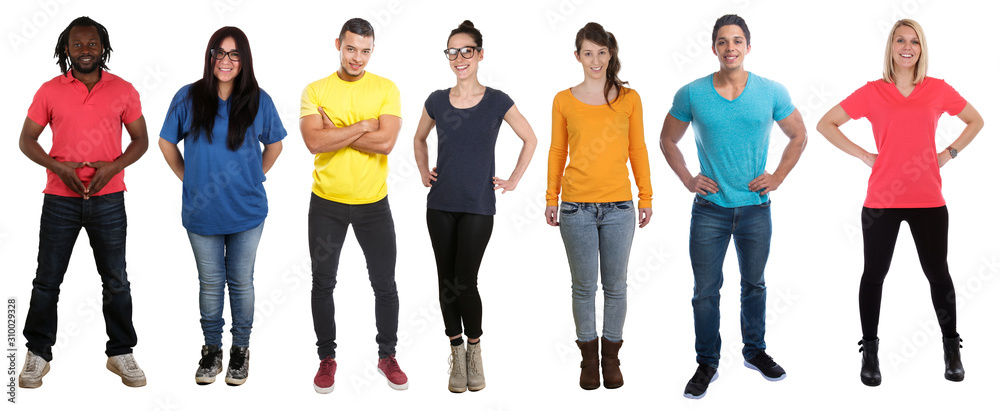

In [96]:
# -------------------------
# Cell 5: Define and Check Local Image
# -------------------------
import os
import cv2
from google.colab.patches import cv2_imshow

print("--- [Step 2] Locating Local Image ---")

# --- DEFINE YOUR IMAGE FILE NAME HERE ---
# Make sure you have uploaded this file to the Colab session.
IMAGE_FILE_NAME = "demo8.jpg"
# ----------------------------------------

IMAGE_FILE_PATH = f"/content/{IMAGE_FILE_NAME}"

# Check if the file exists and display it
if os.path.exists(IMAGE_FILE_PATH):
    print(f"✅ Image found: {IMAGE_FILE_PATH}")

    # Read and display the image for confirmation
    img = cv2.imread(IMAGE_FILE_PATH)
    if img is not None:
        print("   Displaying image for confirmation...")
        # Resize if it's too large for the output window
        max_h = 500
        h, w = img.shape[:2]
        if h > max_h:
            scale = max_h / h
            img_resized = cv2.resize(img, (int(w * scale), int(h * scale)))
            cv2_imshow(img_resized)
        else:
            cv2_imshow(img)
    else:
        print(f"⚠️ Warning: File {IMAGE_FILE_PATH} exists but could not be read by OpenCV.")
        IMAGE_FILE_PATH = None # Mark as failed

else:
    print(f"❌ ERROR: Image not found at {IMAGE_FILE_PATH}")
    print(f"   Please upload '{IMAGE_FILE_NAME}' to your Colab session files (left sidebar).")
    IMAGE_FILE_PATH = None # Mark as failed


--- Initializing MultiPersonMediaPipeConverter (Tasks API) ---
  [Init] ✅ MediaPipe ObjectDetector (Tasks API) model loaded.
  [Init] ✅ MediaPipe Pose model loaded.
  [Init] ✅ Loaded URDF. Found 10 controllable joints.
  [Init] ✅ Joint map defined for 10 joints.
--- Converter Initialized Successfully ---

--- [Module 1 START] Processing Image: demo8.jpg ---
  [Step 1] ✅ Image loaded (1000x411).
  [Stage 1] Running Person Detector (Multi-Person)...
  [Stage 1] ✅ Found 7 potential 'Person' bounding boxes.
  [Stage 2] Running Pose Estimator on each detected person...
  [Stage 2] ✅ Successfully extracted 7 skeletons.

--- Output for Task 1.2: List of Skeletons ---
Total skeletons found: 7

  Skeleton 1 [Array of (x, y, confidence)]: (Shape: (33, 3))
[[907.58  48.58   1.  ]
 [911.71  43.03   1.  ]
 [913.88  43.22   1.  ]
 [916.56  43.44   1.  ]
 [903.36  42.55   1.  ]
 [899.93  42.6    1.  ]
 [897.27  42.72   1.  ]
 [919.87  48.     1.  ]
 [892.77  47.47   1.  ]
 [912.37  58.09   1.  ]
 [9

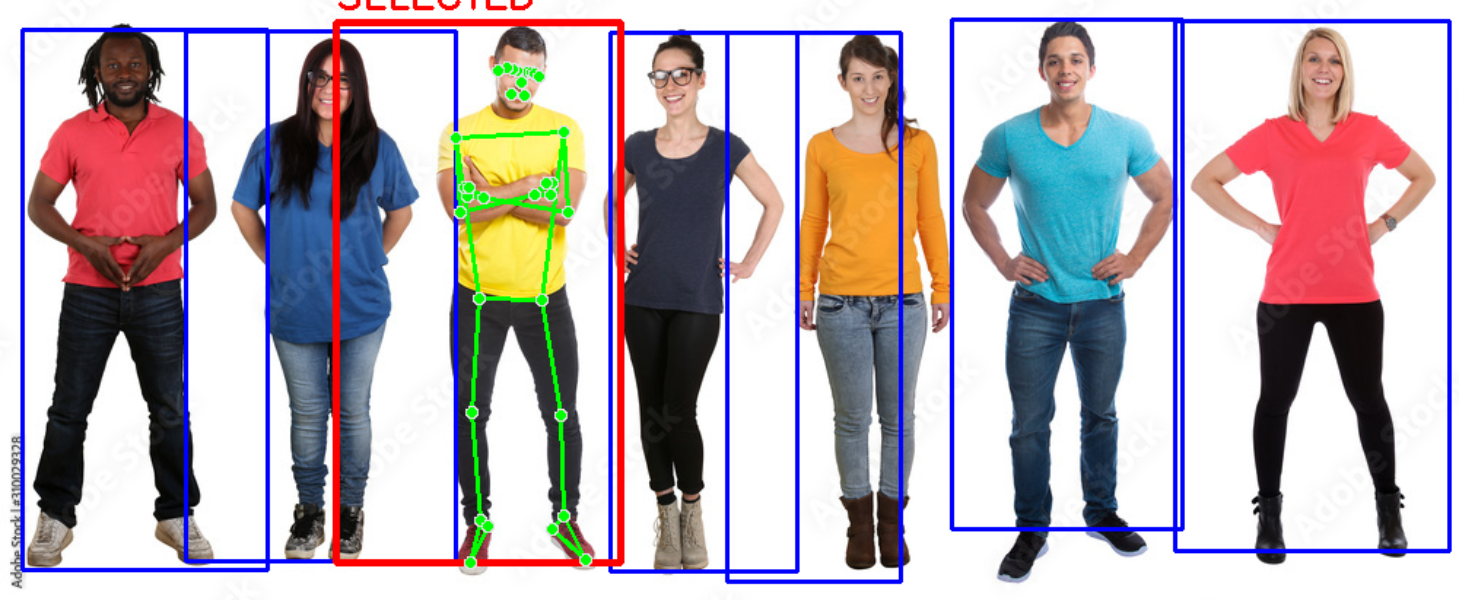


--- [MODULE 1 SUCCESS] (Total time: 0.92s) ---
  theta_init (10 angles):

Joint Name      Radians    Degrees   
--------------- ---------- ----------
j_shoulder_l    -0.072     -4.1       ✅
j_elbow_l       -1.138     -65.2      ✅
j_shoulder_r    0.035      2.0        ✅
j_elbow_r       1.074      61.5       ✅
j_thigh_l       3.024      173.3      ✅
j_shin_l        -3.091     -177.1     ✅
j_foot_l        2.948      168.9      ✅
j_thigh_r       -3.052     -174.9     ✅
j_shin_r        3.081      176.5      ✅
j_foot_r        -3.022     -173.1     ✅

  (Note: '⚠️ (default)' means low confidence or 'j_foot' mismatch, angle set to 0.0)

  Final Output (θinit): 
[-0.07 -1.14  0.03  1.07  3.02 -3.09  2.95 -3.05  3.08 -3.02]
--------------------------------------------------


========= FINAL MODULE 1 OUTPUT =========
  theta_init (10 angles, radians):
  [-0.07 -1.14  0.04  1.07  3.02 -3.09  2.95 -3.05  3.08 -3.02]
  root_pos: [0, 0, 0.8]
  root_orn: [0, 0, 0, 1]


In [100]:
# -------------------------
# Cell 6: Execute the Pipeline (Corrected)
# -------------------------
import numpy as np

# --- Define paths ---
URDF_FILE_PATH = "/content/biped.urdf"
DETECTOR_MODEL_PATH = "/content/efficientdet_lite2.tflite"
IMAGE_FILE_PATH = "/content/demo8.jpg" # Or whatever your file is named

# --- Create Converter Instance ---
try:
    if not os.path.exists(URDF_FILE_PATH):
         raise FileNotFoundError(f"URDF file not found at {URDF_FILE_PATH}. Please run Cell 2 again.")
    if not os.path.exists(DETECTOR_MODEL_PATH):
         raise FileNotFoundError(f"Detector model not found at {DETECTOR_MODEL_PATH}. Please run Cell 3 again.")
    if not os.path.exists(IMAGE_FILE_PATH):
        raise FileNotFoundError(f"Image file not found at {IMAGE_FILE_PATH}. Please run your local image cell (Cell 4) again.")



    converter = MultiPersonMediaPipeConverter(
        urdf_path=URDF_FILE_PATH,
        detector_model_path=DETECTOR_MODEL_PATH,
        min_vis_threshold=0.5, #How visible is angle
        min_detect_conf=0.18  #Min confidence for accecpting people
    )
    # --------------------

    # --- Run on the single local image ---
    theta_init, root_pos, root_orn = converter.run_pipeline(IMAGE_FILE_PATH)

    # --- Print Final Results ---
    print("\n========= FINAL MODULE 1 OUTPUT =========")
    print(f"  theta_init (10 angles, radians):\n  {np.round(theta_init, 3)}")
    print(f"  root_pos: {root_pos}")
    print(f"  root_orn: {root_orn}")
    print("=========================================")


except FileNotFoundError as e:
    print(f"❌❌❌ FILE ERROR: {e}")
except Exception as e:
    print(f"❌❌❌ An unexpected error occurred: {e}")
    import traceback
    traceback.print_exc()